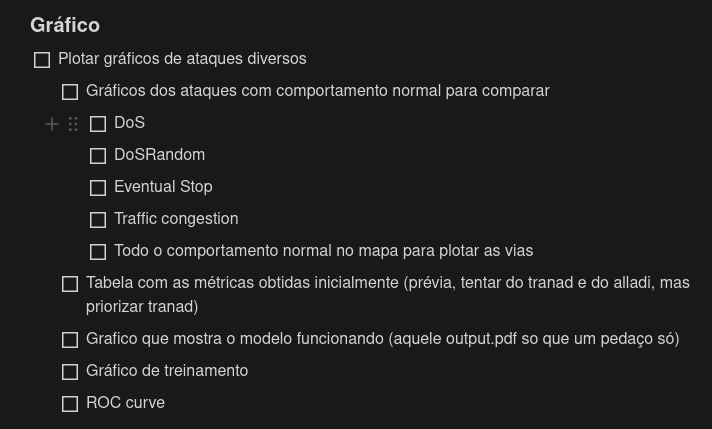

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
dataset = OrderedDict([('DelayedMessages_0709', 0),
             ('ConstPos_0709', 1),
             ('RandomSpeedOffset_0709', 2),
             ('RandomSpeed_0709', 3),
             ('DoSRandom_1416', 4),
             ('MixAll_0024', 5),
             ('DoS_0709', 6),
             ('ConstSpeedOffset_1416', 7),
             ('ConstSpeedOffset_0709', 8),
             ('ConstPosOffset_1416', 9),
             ('EventualStop_0709', 10),
             ('DataReplay_1416', 11),
             ('DoSRandom_0709', 12),
             ('ConstSpeed_1416', 13),
             ('EventualStop_1416', 14),
             ('DelayedMessages_1416', 15),
             ('GridSybil_1416', 16),
             ('Disruptive_1416', 17),
             ('DoSRandomSybil_1416', 18),
             ('Disruptive_0709', 19),
             ('DoSDisruptiveSybil_1416', 20),
             ('DoSDisruptive_1416', 21),
             ('DoSDisruptiveSybil_0709', 22),
             ('RandomPos_1416', 23),
             ('DataReplaySybil_1416', 24),
             ('DataReplay_0709', 25),
             ('RandomSpeed_1416', 26),
             ('RandomPos_0709', 27),
             ('GridSybil_0709', 28),
             ('ConstSpeed_0709', 29),
             ('DoS_1416', 30),
             ('RandomPosOffset_0709', 31),
             ('ConstPos_1416', 32),
             ('DoSDisruptive_0709', 33),
             ('DoSRandomSybil_0709', 34),
             ('RandomPosOffset_1416', 35),
             ('RandomSpeedOffset_1416', 36),
             ('ConstPosOffset_0709', 37),
             ('DataReplaySybil_0709', 38)])

In [3]:
V = pd.read_feather('out_veremi/veremi-full.feather')

In [ ]:
dataset = 23
receiver = 9375
sender = 9381

snd = V[(V.dataset_id == dataset) & (V.receiver == receiver) & (V.sender == sender)][['snd_pos_x', 'snd_pos_y']].rename(columns={ 'snd_pos_x': 'x', 'snd_pos_y': 'y' })
rcv = V[(V.dataset_id == dataset) & (V.receiver == receiver) & (V.sender == sender)][['rcv_pos_x', 'rcv_pos_y']].rename(columns={ 'rcv_pos_x': 'x', 'rcv_pos_y': 'y' })

snd['type'] = 0
rcv['type'] = 1
pd.concat([
    snd,
    rcv,
], axis=0).plot.scatter(x='x', y='y', c='type', s=5, cmap='viridis', figsize=(20,20))

In [24]:
map_data = V[(V.attack_type == 0)].sample(frac=0.1)[['snd_pos_x', 'snd_pos_y']] #.plot.scatter(x='snd_pos_x', y='snd_pos_y', s=2, color='black', figsize=(20,20))

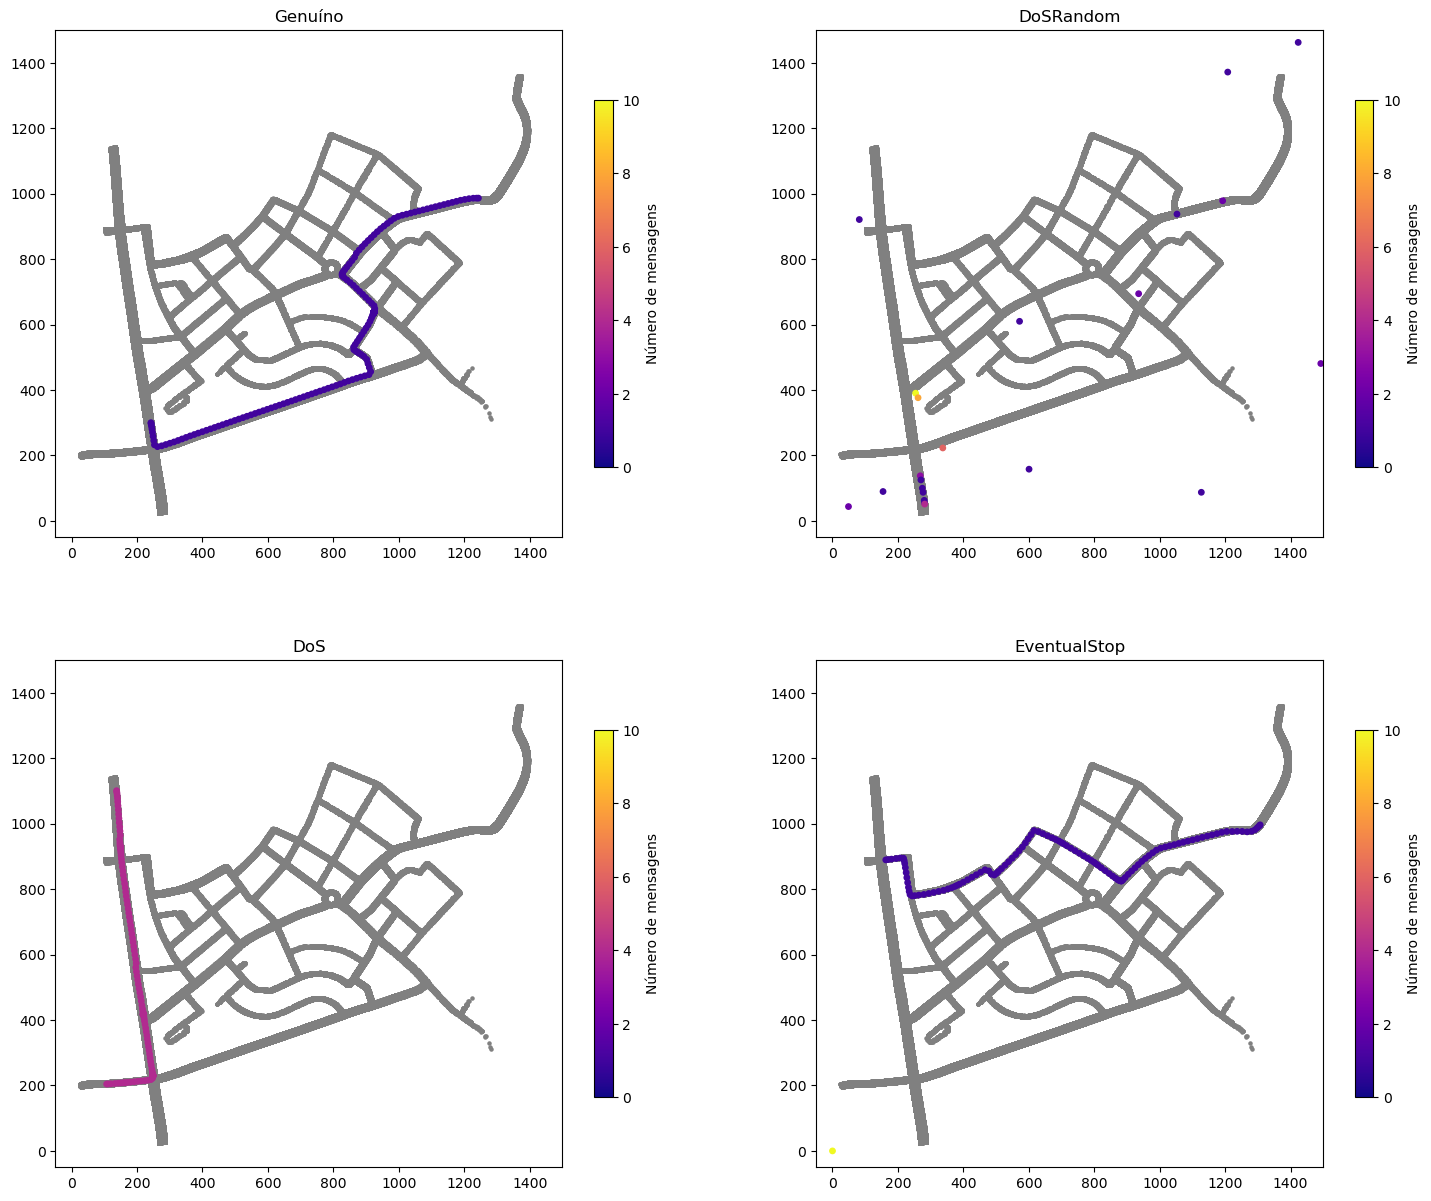

In [30]:
from matplotlib.legend import Legend

dataset = 5

senders = [
    ('Genuíno', 117825),
    ('DoSRandom', 148011),
    ('DoS', 100095),
    ('EventualStop', 28953),
]
sender_dos = 100095 # 108753# 
sender_dos_rand = 100095 # 108753# 
sender_evt_stop = 100095 # 108753# 
sender_traffic_congestion = 100095 # 108753# 
sender_legit = 100095 # 108753# 
sender = 49593

f, axes_rows = plt.subplots(2, 2, figsize=(18, 15))

i = 0

for ax_row in axes_rows:
    for ax in ax_row:
        title, sender = senders[i]
        i += 1
        
        snd = V[(V.dataset_id == dataset) & (V.sender == sender)]

        snd = snd.groupby(['message_id']).first().sort_values('bsm_rcv_time').groupby(['snd_pos_x', 'snd_pos_y']).size().rename('n_messages')
        snd = snd.reset_index()
        
        
        norm = plt.Normalize(vmin=0, vmax=10)
        cmap = 'plasma'
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        
        ax.scatter(map_data['snd_pos_x'], map_data['snd_pos_y'], s=5, c='gray')
        ax.scatter(snd['snd_pos_x'], snd['snd_pos_y'], s=15, c=snd['n_messages'], cmap=cmap, norm=norm)

        interval = 50

#         minx = round(snd.snd_pos_x.min() - interval)
#         minx = minx - (minx % 50)

#         miny = round(snd.snd_pos_y.min() - interval)
#         miny = miny - (miny % 50)

#         minx = min(minx, miny)
#         miny = minx

#         maxx = round(snd.snd_pos_x.max() + interval)
#         maxx = maxx + (maxx % 50) 

#         maxy = round(snd.snd_pos_y.max() + interval)
#         maxy = maxy + (maxy % 50) 

        ax.set_xlim(-50, 1500)
        ax.set_ylim(-50, 1500)
        ax.set_aspect('equal', adjustable='box')

        f.colorbar(sm, label='Número de mensagens', ax=ax, shrink=0.7)
        ax.set_title(title)


#     custom_x_ticks = range(minx, maxx, interval)
#     custom_y_ticks = range(miny, maxy, interval)
#     ax.xticks(custom_x_ticks)
#     ax.yticks(custom_y_ticks)

#     ax.xlabel('Posição em X')
#     ax.ylabel('Posição em Y')

plt.show()
f.savefig('foo.png')